<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Binary_Logistic_Regression_Breast_Cancer_ROC_PR_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset bawaan: Breast Cancer (binary)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score, roc_curve, average_precision_score,
                             precision_recall_curve, confusion_matrix, classification_report)

In [2]:
#  Data & seed
seed = 2025
print("Random seed:", seed)
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=seed, stratify=y
)

Random seed: 2025


In [3]:
#  Pipeline & training
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, class_weight="balanced", solver="lbfgs"))
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=5000))])

In [4]:
#  Prediksi & metrik
proba = pipe.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, proba)
ap = average_precision_score(y_test, proba)
prec, rec, thr = precision_recall_curve(y_test, proba)
f1 = 2 * prec * rec / (prec + rec + 1e-12)
best_idx = np.argmax(f1[:-1])  # selaraskan dengan thr
best_thr = thr[best_idx]
y_pred = (proba >= best_thr).astype(int)
cm = confusion_matrix(y_test, y_pred)

In [5]:
print(f"ROC AUC: {auc:.3f}")
print(f"Average Precision (PR-AUC): {ap:.3f}")
print(f"Best F1: {f1[best_idx]:.3f} @ threshold={best_thr:.3f}")
print("Confusion matrix:\n", cm)
print("Classification report:\n", classification_report(y_test, y_pred, digits=3))

ROC AUC: 0.985
Average Precision (PR-AUC): 0.990
Best F1: 0.973 @ threshold=0.688
Confusion matrix:
 [[49  4]
 [ 1 89]]
Classification report:
               precision    recall  f1-score   support

           0      0.980     0.925     0.951        53
           1      0.957     0.989     0.973        90

    accuracy                          0.965       143
   macro avg      0.968     0.957     0.962       143
weighted avg      0.966     0.965     0.965       143



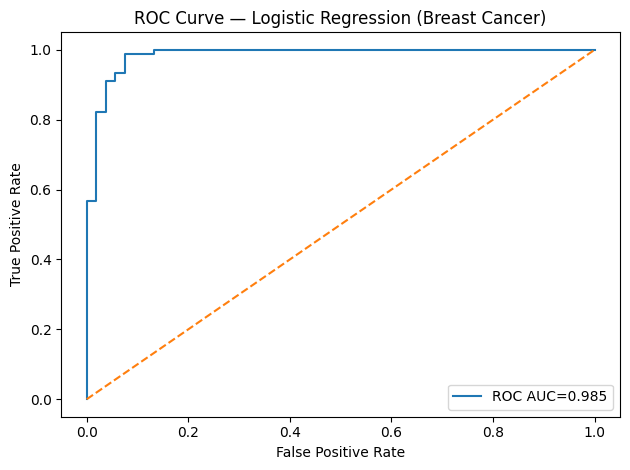

In [6]:
#  Grafik 1 — ROC Curve
fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC={auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression (Breast Cancer)")
plt.legend()
plt.tight_layout()
plt.show()

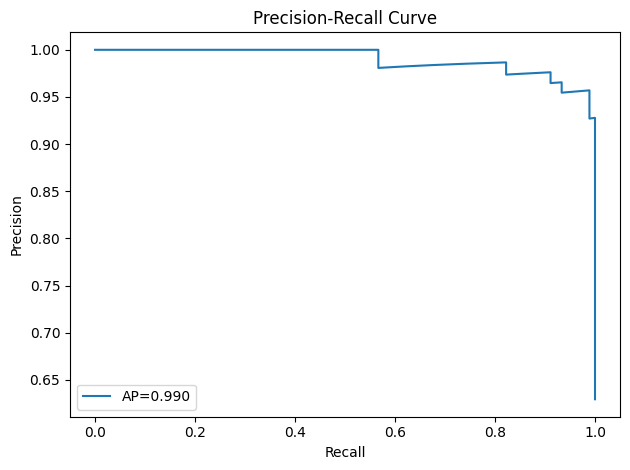

In [7]:
#  Grafik 2 — Precision-Recall Curve
plt.figure()
plt.plot(rec, prec, label=f"AP={ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.tight_layout()
plt.show()